# <span style="color:green"> Numerical Simulation Laboratory: Numerical Exercises 9 </span>
## Exercise 09.1

## <span style="color:royalblue"> Comment on the C++ code - Structure </span> 
The C++ code is based on the class Genetic (genetic.h). In particular, it contains:
1. Data:
    - $X$, a vector of $N_x$ Vector elements (d-dimensional points, see vector.h) that stores the points of a generic path (in any dimension) and allows for a direct calculation of distances (Distance(Vector), Distance2(Vector) methods). For this problem, we will use 2D vectors.
    - Individuals, arrays of indices referred to the ordered path, stored in
    - $Population$, the container of each individual, which is a $N_{pop} \times N_x$ vector of indices
    - $L$, the list of weights of each path, computed with the L function (L1 or L2)
    - $Order$, an auxiliary vector which allows to sort the individuals in an increasing order (using L as weight) and to perform swaps without affecting the Population array (thus increasing the efficiency at the expense of the immediacy of the code)
2. Methods:
    - *Generation of the point pattern*: 
        * $\mathrm{RandomCube(l)}$, which creates $N_x$ points in a $d$-dimensional cube of edge $l$; 
        * $\mathrm{RandomSphSurface(R)}$, which generates $N_x$ points on a $d$-dimensional spherical surface of radius $R$ (in 2D, this is just a circumference);
    - *Mutation*: the mutation is performed with 4 "simple" algorithms and the Crossing Over.
        * $\mathrm{Swap(I, gene_1, gene_2)}$: swaps two genes of the individual $I$;
        * $\mathrm{Permute(I, b, first, last)}$: permutes two blocks of $b$ genes at positions $first$, $last$ (the latter is by default set to be the contiguous position after the first block);
        * $\mathrm{Shift(I, pos, n, m)}$: shifts $n$ genes (starting from the position $pos$) by $m$ positions to the right ($m$>0) or left ($m$<0);
        * $\mathrm{Invert(I, pos, n)}$: simply flips the $n$ genes following $pos$;
        * $\mathrm{CrossingOver(I_1, I_2, cut)}$: performs a cut in the chromosomes of $I_1$ and $I_2$ at the position $cut$ (first gene subject to the exchange).
    - *Sorting*: $\mathrm{Sort()}$ performs the sorting of $L$ and stores the order in the vector $Order$. This means that no swaps are carried out in $X$ or $Population$;
    - *Selection*: $\mathrm{Select()}$ produces a new generation. The new generation is created by **preserving the first $F$ best individuals of the previous generation (unaltered)**, while the remaining $N_{pop}-F$ individuals are **generated by means of the mutation of the best $N_{pop}-F$ elements of the older generation.** Thus **the last $F$ worst individuals are completely discarded.** <br> 
The mutations are **chosen randomly via the method $\mathrm{Mutate(first, last)}$**, which assigns a specific probability of each simple mutation ($p<10\%$) or Crossing Over ($p>50\%$) to take place. The parameters of the mutation methods are **randomly determined as well.**                              

## <span style="color:royalblue"> Comment on the C++ code - Usage </span>
The code is structured in such a way that all the fundamental interactions with the user occur via the file **input.dat**. Indeed, in this file one can set the population size, the number of points of the path, the spatial dimensions, the type of region (square 's' or circumference 'c'), its radius/edge and the norm $L^p$. All the output files are **generated according to the configuration selected**, hence their name will be $\textit{[path|L]+[S|C]+[1|2]}$ to specify the object (the path sequence or the $L$ values), the distribution of points and the norm function used.

## <span style="color:royalblue"> Comment on the Python code </span>
Once the four desired configurations have been generated with the C++ program, the results can be plotted: in particular, we consider the plots of each path (its physical representation) and the behaviour of the function $L$ as a function of the generations and of the individuals.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def ReadPath(filename):
    Np, d, L = [None]*3
    _type = [int, int, float]
    Index, Point = [], []
    Temp = []
    with open("Esercizio09.1/"+filename) as file:
        [d, Np, L] = [_type[i](file.readline().split()[1]) for i in range(0, 3)]
        Point = [[] for i in range(0, d)]
        for line in file:
            Temp = line.split()
            Index.append(int(Temp[0]))
            for i in range(0, d):
                Point[i].append(float(Temp[i+1]))
    return Np, d, L, Index, Point

def ReadL(filename):
    L, MeanL = [], []
    with open("Esercizio09.1/"+filename) as file:
        [Ngen, Npop] = [int(file.readline().split()[1]) for i in range(0, 2)]
        for i in range(0, Ngen):
            MeanL.append(float(file.readline()))
        file.readline()
        for i in range(0, Npop):
            L.append(float(file.readline()))
    return L, MeanL

## <span style="color:royalblue"> Path </span>
In this section we represent the best path of each configuration. In particular, for a suitable choice of initial parameters, the best path for a circular distribution can be easily verified: the points shall be connected in a contiguous way, with all the sub-paths lying on the hypothetical circumference (thus no chords should appear). Also, the total length $L$ obtained via the $L^1$ norm should be less than $2\pi R$ (in general $L$ is very close to $2\pi R$, for a path composed of a sufficiently high number of nodes).

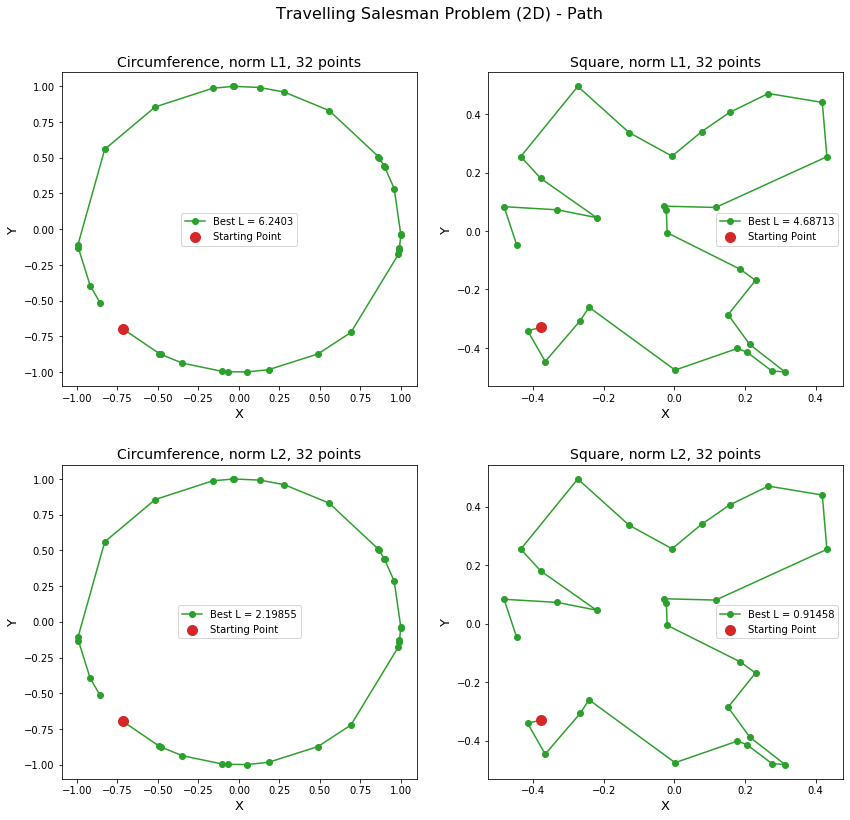

In [2]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 13))
ax = ax.flatten()
fig.suptitle("Travelling Salesman Problem (2D) - Path", y = 0.95, size=16)
fig.subplots_adjust(hspace=0.25)
filename = ["pathC1.out", "pathS1.out", "pathC2.out", "pathS2.out"]
title = ["Circumference, norm L1", "Square, norm L1", 
         "Circumference, norm L2", "Square, norm L2"]
for p in range(0, 4):
    Np, d, L, Index, Point = ReadPath(filename[p])
    ax[p].plot(Point[0], Point[1], '-o', label=f"Best L = {L}", color="tab:green")
    ax[p].legend(prop={'size': 10})
    ax[p].scatter(Point[0][0], Point[1][0], color="tab:red", s=100, zorder=10, label="Starting Point")
    ax[p].legend(prop={'size': 10})
    ax[p].set_title(title[p]+f", {Np} points", fontsize=14)
    ax[p].set_xlabel("X", fontsize=13)
    ax[p].set_ylabel("Y", fontsize=13)
plt.show()

## <span style="color:royalblue"> Length of the paths </span>
We now plot the mean values $\langle L\rangle$ (restricted to the best half of each population) and the distribution of $L$ in the last generation. 

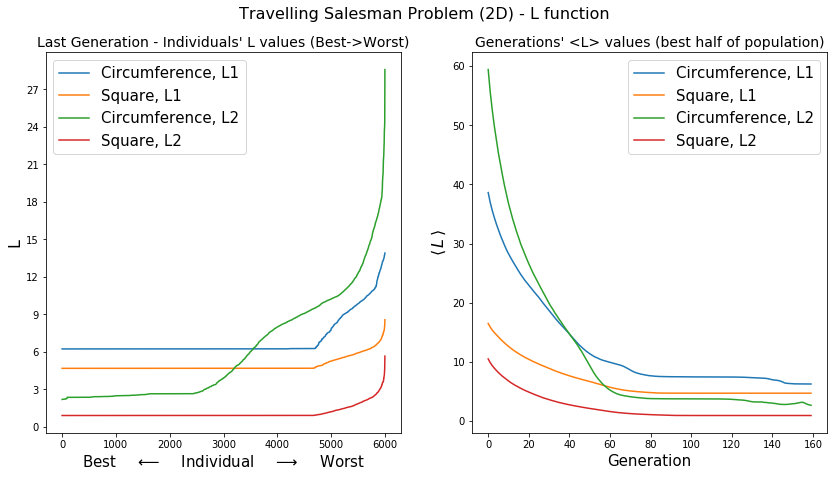

In [3]:
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax2 = ax2.flatten()
fig2.suptitle("Travelling Salesman Problem (2D) - L function", y = 0.97, size=16)
fig2.subplots_adjust(hspace=0.25)
filename = ["LC1.out", "LS1.out", "LC2.out", "LS2.out"]
title = ["Last Generation - Individuals' L values (Best->Worst)", "Generations' <L> values (best half of population)"]
lab = ["Circumference, L1", "Square, L1", "Circumference, L2", "Square, L2"]    
    
for i in range(0, 4):
    L, MeanL = ReadL(filename[i])
    ax2[0].plot(np.arange(0, len(L)), L, label=lab[i])
    ax2[1].plot(np.arange(0, len(MeanL)), MeanL, label=lab[i])

ax2[0].legend(prop={'size': 15})
ax2[1].legend(prop={'size': 15})
ax2[0].set_title(title[0], fontsize=14)
ax2[1].set_title(title[1], fontsize=14)
ax2[0].set_xlabel(r"Best    $\longleftarrow$    Individual    $\longrightarrow$    Worst", fontsize=15)
ax2[0].set_ylabel("L", fontsize=16)
ax2[1].set_xlabel("Generation", fontsize=15)
ax2[1].set_ylabel(r"$\langle\thinspace L\thinspace\rangle$", fontsize=16)
ymin, ymax = ax2[0].get_ylim()
ax2[0].set_yticks(np.arange(0, ymax, 3))

plt.show()

We see that the majority of individuals (except for the Circumference, L2) has reached the optimal configuration in the last generation. Moreover, the mean values $\langle L \rangle$ sharply decay throughout the first generations and then decrease more slowly. In general, the case of the Circumference L2 seems the most difficult to compute, due to the greater distance between points and the quadratic behaviour of L2: the square has *edge 1*, while the circumference is *inscribed* in a square of *edge 2*.